In [3]:
using Pkg
Pkg.add("CUDA")

   Updating registry at `~/.julia/registries/General`
  Resolving package versions...
No Changes to `~/code/github/RadiativeTransfer.jl/Project.toml`
No Changes to `~/code/github/RadiativeTransfer.jl/Manifest.toml`


In [17]:
using RadiativeTransfer.PhaseFunction
using Distributions
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


In [9]:
aero = PhaseFunction.UnivariateAerosol(LogNormal(log(0.3), log(1.2)), 30, 1000, 1.3, 0.0)

UnivariateAerosol{Int64,Float64}(LogNormal{Float64}(μ=-1.2039728043259361, σ=0.1823215567939546), 30, 1000, 1.3, 0.0)

In [8]:
?PhaseFunction.UnivariateAerosol

```
struct UnivariateAerosol{FT}
```

A struct which provides all univariate aerosol parameters needed for Mie  computation

# Fields

  * `size_distribution`

    Univariate size distribution
  * `r_max`

    Maximum radius `[μm]`
  * `nquad_radius`

    Number of quadrature points for integration over size distribution
  * `nᵣ`

    Real part of refractive Index
  * `nᵢ`

    Imaginary part of refractive Index


In [10]:
# Aerosol particle distribution and properties 
μ  = 0.3                # Log mean radius
σ  = 6.82               # Log stddev of radius
r_max = 30.0            # Maximum radius
nquad_radius = 2500     # Number of quadrature points for integrating of size dist.
nᵣ = 1.3                # Real part of refractive index
nᵢ = 0.0                # Imag part of refractive index

size_distribution = LogNormal(log(μ), log(σ))

# Create the aerosol
aero = make_univariate_aerosol(size_distribution, r_max, nquad_radius, nᵣ, nᵢ)

UnivariateAerosol{Float64,Float64}(LogNormal{Float64}(μ=-1.2039728043259361, σ=1.9198594718553708), 30.0, 2500, 1.3, 0.0)

In [11]:
λ = 0.55   # Incident wavelength
polarization_type = Stokes_IQUV()
truncation_type   = δBGE(20, 2)

δBGE{Int64}(20, 2)

In [13]:
model_NAI2 = make_mie_model(NAI2(), aero, λ, polarization_type, truncation_type)

MieModel{NAI2}
  computation_type: NAI2 NAI2()
  aerosol: UnivariateAerosol{Float64,Float64}
  λ: Float64 0.55
  polarization_type: Stokes_IQUV Stokes_IQUV()
  truncation_type: δBGE{Int64}
  wigner_A: Array{Float64}((1, 1, 1)) [0.0]
  wigner_B: Array{Float64}((1, 1, 1)) [0.0]


In [14]:
aerosol_optics_NAI2 = compute_aerosol_optical_properties(model_NAI2);

┌ Info: Fraction of size distribution cut by max radius: 0.8226655996648291 %
└ @ RadiativeTransfer.PhaseFunction /Users/sanghavi/code/github/RadiativeTransfer.jl/src/PhaseFunction/mie_helper_functions.jl:446
Computing PhaseFunctions Siewert NAI-2 style ...100%|███| Time: 0:00:04


In [16]:
?aerosol_optics_NAI2

search: aerosol_optics_NAI2 compute_aerosol_optical_properties



No documentation found.

`aerosol_optics_NAI2` is of type `AerosolOptics{Float64}`.

# Summary

```
struct AerosolOptics{Float64} <: Any
```

# Fields

```
greek_coefs :: GreekCoefs
ω̃          :: Float64
k           :: Float64
```


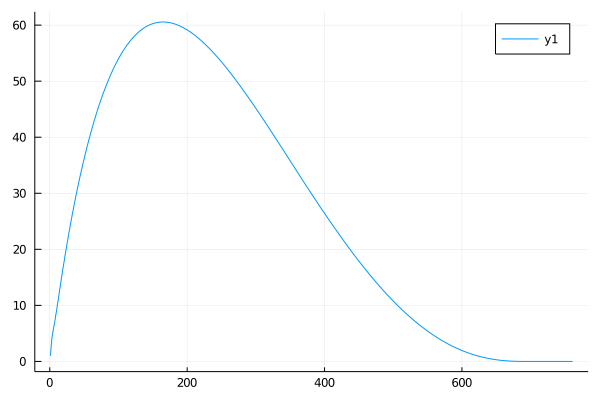

In [20]:
gr()
plot(aerosol_optics_NAI2.greek_coefs.β)

In [26]:
using FastGaussQuadrature
μ, w_μ = gausslegendre(1000)
f₁₁, f₁₂, f₂₂, f₃₃, f₃₄, f₄₄ = PhaseFunction.reconstruct_phase(aerosol_optics_NAI2.greek_coefs, μ)

([0.7928630917681971, 0.5152971129940962, 0.36349299986545763, 0.33159293161919695, 0.2869507171373077, 0.24907378475034925, 0.2382299825740665, 0.220952526582805, 0.2051928812182411, 0.19814642403214924  …  203.81835910474854, 278.47275003941064, 374.9261152090578, 537.6616119856922, 853.8399435730279, 1330.0265932185628, 2433.7398954139076, 5711.790522399852, 12018.432202676373, 18544.940485149018], [-0.0008537736342857561, 0.001831452097582886, 0.014215074513196778, 0.022667174683476447, 0.018567986224764393, 0.012898689898280906, 0.01136232245928597, 0.008728542887864028, 0.004749972095509025, 0.0018730313354345244  …  0.25716563320088853, 0.24340047195644346, 0.15084143004131823, -0.017958535262709255, -0.12288125767842056, -0.14691681770333703, -0.31486849313025245, -0.5999259475165254, -0.5644031502303333, -0.16656822945084512], [0.7928630823752947, 0.5152970831980292, 0.36349300069010004, 0.33159292657581707, 0.28695071859904475, 0.2490737815210633, 0.23822998264225825, 0.22095

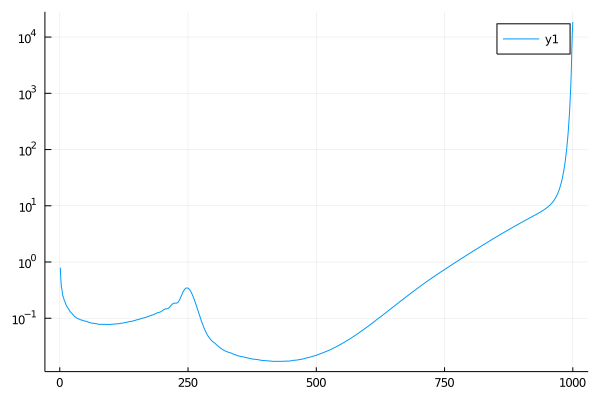

In [28]:
plot(f₁₁, yaxis=:log)